<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/lecture03_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
options(repr.plot.width = 8 , repr.plot.height = 5)

In [2]:
install.packages('nycflights13')
install.packages('Lahman')
install.packages('babynames')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Lecture 3: Advanced data transformations and pipelines

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Use the skills that we learned last week to do advanced data analysis
* Construct pipelines of data transformations
    
This lecture note corresponds to Chapters 4 and 5 of your book.
</div>

In [3]:
# packages we will be using in today's lecture:
library(tidyverse)  # always!
# install these packages if needed
library(nycflights13)
library(Lahman)  
library(babynames)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Review of week 2
Last lecture we learned how to alter the rows and columns of a dataframe:
- `filter()` to keep certain rows that satisfy logical conditions.
- `arrange()` to sort rows according to certain column values.
- `distinct()` to keep only rows that are distinct on some combination of columns.
- `select()` to drop/rename/rearrange columns
- `group_by()` to tell R how your data are grouped
- `summarize()` to create summary tables of your (grouped) data

## The pipe (`%>%`) operator

![pipes](https://i0.wp.com/www.rforecology.com/pipes_image0.png?zoom=2&w=578&ssl=1)

`%>%` (pronounced: "pipe") works by taking the **output** from the left-hand side, and feeding it in as the **input** on the right-hand side:

<div style="margin: 0 auto; padding: 50px; font-size: 36px">
    <code style="background: lightgreen; padding: 5px">output</code>
    <code> %&gt;% </code>
    <code>function(<code style="background: lightgreen; padding: 5px">input</code>, args...)</code>
</div>

**Notes from this section: **
*   group categories tgt
*   **summarize:** min, max, mean, median, etc
* base pipe that comes from python: |> 
* %>% can do more advanced stuff. not avail in python yet. 



## Practice forming pipelines
Let's find the most delayed flight (highest departure delay) for each day of the year:
    
    # A tibble: 370 × 19
    # Groups:   year, month, day [365]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1      848       1835     853    1001    1950     851 MQ     
     2  2013     1     2     2131       1512     379    2340    1741     359 UA     

In [8]:
# most delayed flight for each day
flights%>%
  group_by(year,month,day)%>%
  summarize(max_delay=max(dep_delay,na.rm=T))%>%
  print

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


# A tibble: 365 × 4
# Groups:   year, month [12]
    year month   day max_delay
   <int> <int> <int>     <dbl>
 1  2013     1     1       853
 2  2013     1     2       379
 3  2013     1     3       291
 4  2013     1     4       288
 5  2013     1     5       327
 6  2013     1     6       202
 7  2013     1     7       366
 8  2013     1     8       188
 9  2013     1     9      1301
10  2013     1    10      1126
# … with 355 more rows


What about the *second-most* delayed flight for each day? 

    # A tibble: 369 × 20
    # Groups:   year, month, day [360]
        year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
       <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
     1  2013     1     1     2343       1724     379     314    1938     456 EV     
     2  2013     1     2     1607       1030     337    2003    1355     368 AA     
     3  2013     1     3     2008       1540     268    2339    1909     270 DL     

To do this question (easily) you'll need to use a new function, `min_rank()` (see Chapter 15 of the reading). This function takes a vector of numbers and returns their rank:

In [ ]:
min_rank(c(5, 5, 5, 5, 5))

[1] 1 1 1 1 1

In [12]:
# find the second-most delayed flight of the year
flights%>%
  group_by(year,month,day)%>%
  mutate(rank=min_rank(-dep_delay))%>%
  filter(rank==2)%>%
  print

# A tibble: 369 × 20
# Groups:   year, month, day [360]
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1     2343       1724     379     314    1938     456 EV     
 2  2013     1     2     1607       1030     337    2003    1355     368 AA     
 3  2013     1     3     2008       1540     268    2339    1909     270 DL     
 4  2013     1     4     2058       1730     208       2    2110     172 B6     
 5  2013     1     5     1232        815     257    1405     957     248 9E     
 6  2013     1     6      943        700     163    1227     932     175 EV     
 7  2013     1     6     1113        830     163    1253    1013     160 EV     
 8  2013     1     7     1323        830     293    1604    1154     250 UA     
 9  2013     1     8     1612       1330     162    1844    1617     147 B6     
10  2013     1     9     2223       1810     253     

## &#129300; Quiz

Every day of the year I create a list of the ten most (departure-)delayed flights for that day. Which air carrier appears most frequently on that list?

<ol style="list-style-type: upper-alpha;">
    <li>UA</li>
    <li>9E</li>
    <li>YV</li>
    <li>US</li>
    <li>B6</li>
</ol>

In [20]:
# most commonly delayed carrier
flights%>%
  group_by(year,month,day)%>%
  top_n(10,dep_delay)%>%
  ungroup%>%
  count(carrier)%>%
  arrange(n)%>%
  print

# A tibble: 16 × 2
   carrier     n
   <chr>   <int>
 1 OO          1
 2 AS          2
 3 HA          4
 4 YV         12
 5 F9         16
 6 FL         44
 7 US         68
 8 VX         86
 9 WN        139
10 MQ        238
11 AA        319
12 9E        329
13 DL        423
14 B6        512
15 UA        539
16 EV        949


In [30]:
flights%>%
  group_by(year,month,day)%>%
  top_n(10,dep_delay)%>%
  ungroup%>%
  count(carrier)%>% # count can only work in a tibble, which is why we need to do ungroup, in this case 
  arrange(desc(n))%>%
  print

# A tibble: 16 × 2
   carrier     n
   <chr>   <int>
 1 EV        949
 2 UA        539
 3 B6        512
 4 DL        423
 5 9E        329
 6 AA        319
 7 MQ        238
 8 WN        139
 9 VX         86
10 US         68
11 FL         44
12 F9         16
13 YV         12
14 HA          4
15 AS          2
16 OO          1


## Who is the greatest (baseball) batter of all time?
The `Lahman` dataset contains information on baseball players.

In [31]:
# install.packages("Lahman")
library(Lahman)
as_tibble(Batting) %>% head
# what do all these columns mean?

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,0


In [37]:
# calculate the batting average for each player in the data set
Batting%>%
  group_by(playerID)%>%
  summarize(avg_bat=sum(H)/sum(AB))
  print

playerID,avg_bat
<chr>,<dbl>
aardsda01,0.00000000
aaronha01,0.30499838
aaronto01,0.22881356
aasedo01,0.00000000
abadan01,0.09523810
abadfe01,0.11111111
abadijo01,0.22448980
abbated01,0.25361367
abbeybe01,0.16888889


function (x, ...) 
UseMethod("print")
<bytecode: 0x5637fe5a2270>
<environment: namespace:base>

In [39]:
playerInfo('abramge01') 

,playerID,nameFirst,nameLast
,<chr>,<chr>,<chr>
33,abramge01,George,Abrams


This is weird b/c he's not a batter. so maybe he only bat once & had a perf score. need to take counts into consideration. Amazon example: 5 star but 1 review vs 4.5 star but 1000 review. 

What has happened? Let's look at the first player in the sorted table:

In [38]:
filter(Batting, playerID == 'abramge01') # there's only one record here

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abramge01,1923,1,CIN,NL,3,1,0,1,0,⋯,0,0,0,0,0,NA,0,0,NA,NA


### Always include counts
It is a good idea to include counts of each group when you do a summary. Some groups may have very low numbers of observations, resulting in high variance for the summary statistics. 

What happens if we restrict our batting average calculation to players that had at least 100 at-bats?

## Quiz
Among players who had at least 100 at bats, who had the highest career batting average?
<ol style="list-style-type: upper-alpha;">
    <li>Ty Cobb</li>
    <li>Babe Ruth</li>
    <li>Prof. Terhorst</li>
    <li>Ted Williams</li>
    <li>Hank Williams</li>
</ol>

In [46]:
# highest batting average among players that had 100 or more at bats
Batting%>%
  group_by(playerID)%>%
  summarize(bat_avg=sum(H)/sum(AB),n=sum(AB))%>%
  filter(n>=100)%>%
  print

# A tibble: 9,199 × 3
   playerID  bat_avg     n
   <chr>       <dbl> <int>
 1 aaronha01   0.305 12364
 2 aaronto01   0.229   944
 3 abbated01   0.254  3044
 4 abbeybe01   0.169   225
 5 abbeych01   0.281  1756
 6 abbotfr01   0.209   513
 7 abbotje01   0.263   596
 8 abbotku01   0.256  2044
 9 aberal01    0.14    100
10 abercre01   0.223   386
# … with 9,189 more rows


In [48]:
playerInfo('aaronha01') 

,playerID,nameFirst,nameLast
,<chr>,<chr>,<chr>
2,aaronha01,Hank,Aaron


In [51]:
# try
new_df<-filter(Batting, AB>=100)
new_df%>%
  group_by(playerID)%>%
  summarize(bat_avg=sum(H)/sum(AB))%>%
  print

# A tibble: 7,158 × 2
   playerID  bat_avg
   <chr>       <dbl>
 1 aaronha01   0.305
 2 aaronto01   0.230
 3 abbated01   0.255
 4 abbeych01   0.281
 5 abbotfr01   0.209
 6 abbotje01   0.277
 7 abbotku01   0.256
 8 abercre01   0.212
 9 abernbr01   0.253
10 aberscl01   0.279
# … with 7,148 more rows


## Quiz
Among players who had at least 100 at bats in a given season, what was the highest batting average _in that season_?
<ol style="list-style-type: upper-alpha;">
    <li>Ted Williams</li>
    <li>Steven Colbert</li>
    <li>Chonky Squirrel</li>
    <li>Levi Meyerle</li>
    <li>Tom Riddle</li>
</ol>

In [54]:
glimpse(Batting) # use yearID to find season 

Rows: 110,495
Columns: 22
$ playerID <chr> "abercda01", "addybo01", "allisar01", "allisdo01", "ansonca01…
$ yearID   <int> 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1…
$ stint    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ teamID   <fct> TRO, RC1, CL1, WS3, RC1, FW1, RC1, BS1, FW1, BS1, CL1, CL1, W…
$ lgID     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ G        <int> 1, 25, 29, 27, 25, 12, 1, 31, 1, 18, 22, 1, 10, 3, 20, 29, 1,…
$ AB       <int> 4, 118, 137, 133, 120, 49, 4, 157, 5, 86, 89, 3, 36, 15, 94, …
$ R        <int> 0, 30, 28, 28, 29, 9, 0, 66, 1, 13, 18, 0, 6, 7, 24, 26, 0, 0…
$ H        <int> 0, 32, 40, 44, 39, 11, 1, 63, 1, 13, 27, 0, 7, 6, 33, 32, 0, …
$ X2B      <int> 0, 6, 4, 10, 11, 2, 0, 10, 1, 2, 1, 0, 0, 0, 9, 3, 0, 0, 1, 0…
$ X3B      <int> 0, 0, 5, 2, 3, 1, 0, 9, 0, 1, 10, 0, 0, 0, 1, 3, 0, 0, 1, 0, …
$ HR       <int> 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ RBI      <in

In [56]:
# highest seasonal batting average
Batting%>%
  group_by(playerID,yearID)%>%
  summarize(bat_avg=sum(H)/sum(AB),n=sum(AB))%>%
  filter(n>=100)%>%
  print

`summarise()` has grouped output by 'playerID'. You can override using the
`.groups` argument.


# A tibble: 39,861 × 4
# Groups:   playerID [7,207]
   playerID  yearID bat_avg     n
   <chr>      <int>   <dbl> <int>
 1 aaronha01   1954   0.280   468
 2 aaronha01   1955   0.314   602
 3 aaronha01   1956   0.328   609
 4 aaronha01   1957   0.322   615
 5 aaronha01   1958   0.326   601
 6 aaronha01   1959   0.355   629
 7 aaronha01   1960   0.292   590
 8 aaronha01   1961   0.327   603
 9 aaronha01   1962   0.323   592
10 aaronha01   1963   0.319   631
# … with 39,851 more rows


## The Steroid Era of Baseball

> [Baseball] remained relatively the same until the 90s when steroid use became rampant. Famous sluggers like Barry Bonds, Mark McGwire, and Sammy Sosa rose to fame during this era. They were beloved at the time until we later found out that they were cheating.

https://www.wagerbop.com/how-home-runs-and-batting-averages-have-changed-over-the-last-30-years/

![barry bounds](https://cdn.ebaumsworld.com/mediaFiles/picture/2605038/87087115.jpg)

filter data before 90. find averages there.
filter data after 90. find averages here.
plot and see if there are changes. 

## Can we see the steroid era reflected in the data?

In [58]:
# summarize the dataset in order to investigate steroid era in batters

## And now for something completely different
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. Using this information, they have produced a [public database](https://www.ssa.gov/oact/babynames/) of name frequencies in the U.S.

In [57]:
head(babynames)

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


## Names from other countries
Obviously a large number of people in the class were not born in the US and do not have English names. A similar dataset on Chinese names is available from the `ChineseNames` package:

In [60]:
# install.packages("ChineseNames")
library(ChineseNames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘htmltools’, ‘interp’, ‘checkmate’, ‘htmlwidgets’, ‘markdown’, ‘png’, ‘jpeg’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘zoo’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘SparseM’, ‘MatrixModels’, ‘openxlsx’, ‘Rcpp’, ‘gridtext’, ‘bayestestR’, ‘correlation’, ‘datawizard’, ‘insight’, ‘modelbased’, ‘parameters’, ‘mnormt’, ‘lme4’, ‘pbkrtest’, ‘reshape2’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘sandwich’, ‘lpSolve’, ‘Hmisc’, ‘pbivnorm’, ‘carData’, ‘abind’, ‘quantreg’, ‘pander’, ‘rio’, ‘plyr’, ‘ggtext’, ‘cowplot’, ‘see’, ‘psych’, ‘afex’, ‘emmeans’, ‘effectsize’, ‘performance’, ‘lmerTest’, ‘mediation’, ‘interactions’, ‘lavaan’, ‘car’, ‘jtools’, ‘texreg’, ‘MuMIn’, ‘bruceR’


Warning message in install.packages("ChineseNames"):
“installation of package ‘interp’ had non-zero exit status”
Warning message in install.packages("ChineseNames"):
“installation of pack

ERROR: ignored

This package contains an `givenname` table containing naming frequency for (single-character) given names:

In [ ]:
givenname %>% top_n(5, n.female)

character,pinyin,bihua,n.male,n.female,name.gender,n.1930_1959,n.1960_1969,n.1970_1979,n.1980_1989,⋯,ppm.1980_1989,ppm.1990_1999,ppm.2000_2008,name.ppm,name.uniqueness,corpus.ppm,corpus.uniqueness,name.valence,name.warmth,name.competence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
兰,lan2,5,652920,24861769,-0.9488201,13805295,5312327,3364874,1903020,⋯,9193.333,5395.524,2450.622,17010.05,1.769269,191.5842,3.715379,4.1875,3.9,3.5
丽,li4,7,359797,20528424,-0.9655502,1661782,2957007,5277436,6708350,⋯,32407.488,20527.613,9257.589,17840.82,1.748561,149.2029,3.823322,4.2500,3.6,3.0
秀,xiu4,7,2050069,29968210,-0.8719438,16660338,7064595,4823078,2242688,⋯,10834.242,5808.655,2842.289,21487.49,1.667794,149.6530,3.822022,4.0625,4.0,3.6
英,ying1,8,2129955,38849711,-0.8960482,21309061,8568501,6588993,3019930,⋯,14589.034,6768.631,3604.622,27444.92,1.561522,422.6557,3.372987,4.1250,3.6,3.4
玉,yu4,5,9692197,24546985,-0.4338535,14771006,7306823,5336682,3390050,⋯,16377.053,14296.357,11294.700,24860.19,1.604478,173.0625,3.759295,4.3750,4.2,3.4


This table is in so-called "wide format" and has to be reshaped to analyze names over time. We'll learn how to do this next week. In the meantime, you can run:

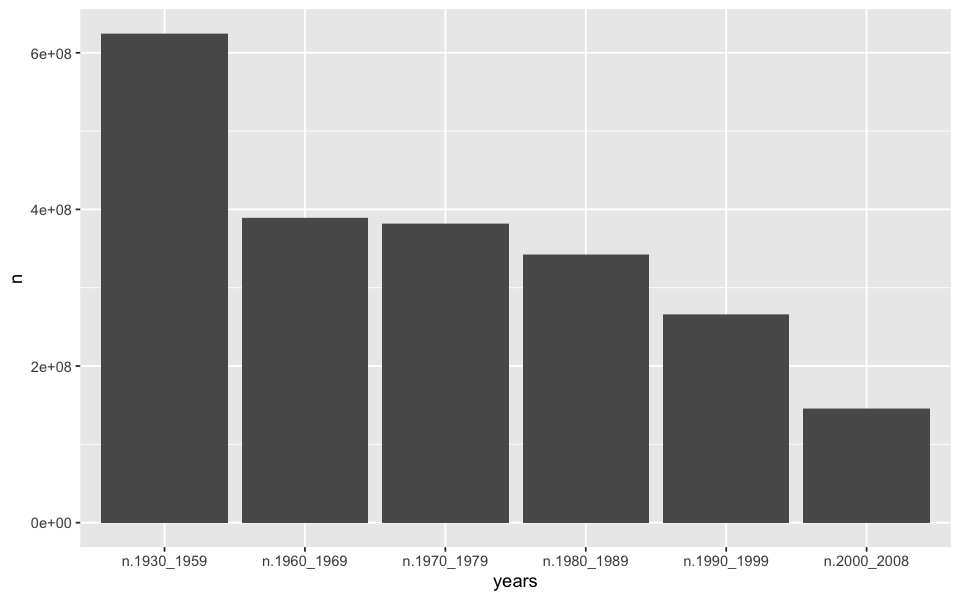

In [ ]:
givenname %>% 
    pivot_longer(n.1930_1959:n.2000_2008, names_to="years", values_to="n") %>% 
    mutate(years = factor(years, ordered=T)) %>% # years is already there, but we convert into a factor 
    ggplot(aes(x=years, y=n)) + geom_col() # we add layers w plus symbol, not pipe 

## How common is my name over time?

![image.png](attachment:image.png)

In [61]:
# Plot my name over time
babynames%>%
  filter(name=="Jonathan")%>%
  print

# A tibble: 202 × 5
    year sex   name         n      prop
   <dbl> <chr> <chr>    <int>     <dbl>
 1  1880 M     Jonathan    18 0.000152 
 2  1881 M     Jonathan    21 0.000194 
 3  1882 M     Jonathan    27 0.000221 
 4  1883 M     Jonathan    17 0.000151 
 5  1884 M     Jonathan    21 0.000171 
 6  1885 M     Jonathan    30 0.000259 
 7  1886 M     Jonathan    19 0.000160 
 8  1887 M     Jonathan    10 0.0000915
 9  1888 M     Jonathan    17 0.000131 
10  1889 M     Jonathan    12 0.000101 
# … with 192 more rows


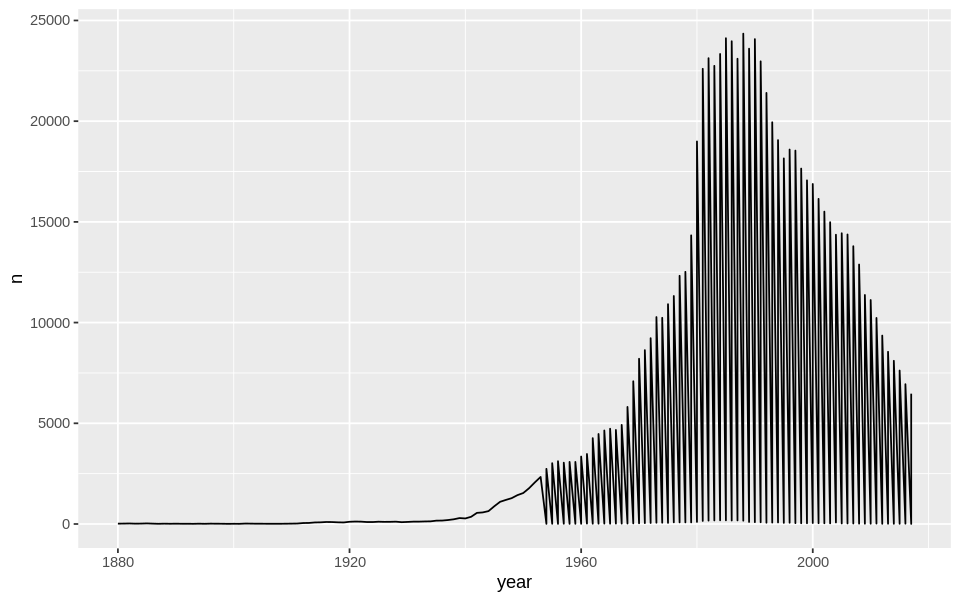

In [62]:
babynames%>%
  filter(name=="Jonathan")%>%
  ggplot(aes(x=year,y=n))+ # looks weird b/c plotting both males & females
  geom_line()

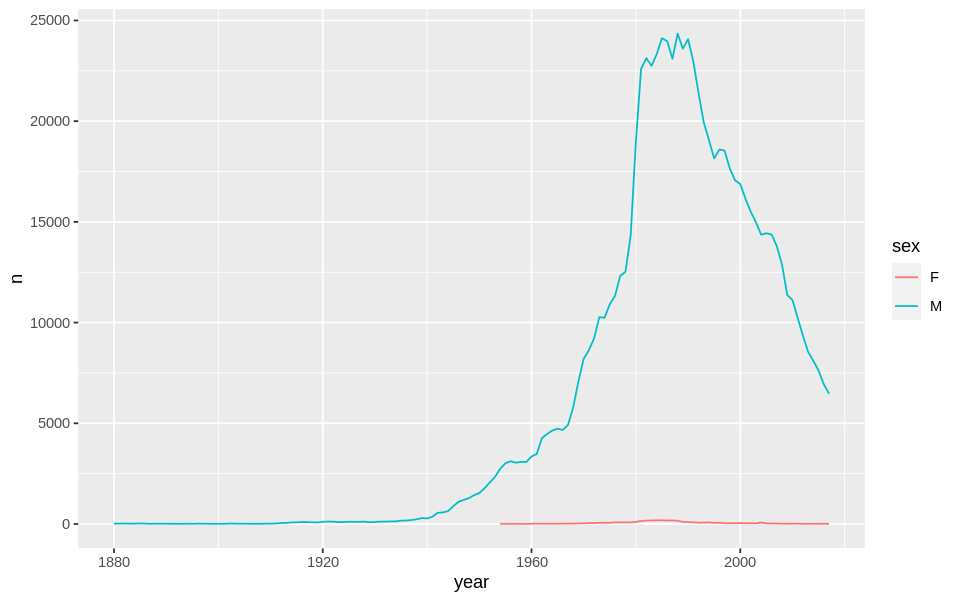

In [63]:
babynames%>%
  filter(name=="Jonathan")%>%
  ggplot(aes(x=year,y=n,color=sex))+ # adding color=sex sliced the data 
  geom_line()

In [64]:
glimpse(babynames)

Rows: 1,924,665
Columns: 5
$ year <dbl> 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880,…
$ sex  <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ name <chr> "Mary", "Anna", "Emma", "Elizabeth", "Minnie", "Margaret", "Ida",…
$ n    <int> 7065, 2604, 2003, 1939, 1746, 1578, 1472, 1414, 1320, 1288, 1258,…
$ prop <dbl> 0.07238359, 0.02667896, 0.02052149, 0.01986579, 0.01788843, 0.016…


In [ ]:
# Plot my name and my neighbor/friend/girlfriend's name


## Names from other countries
Obviously a large number of people in the class were not born in the US and do not have English names. A similar dataset on Chinese names is available from the `ChineseNames` package:

In [ ]:
# install.packages("ChineseNames")
library(ChineseNames)

This package contains an `givenname` table containing naming frequency for (single-character) given names:

In [ ]:
givenname %>% top_n(5, n.female)

character,pinyin,bihua,n.male,n.female,name.gender,n.1930_1959,n.1960_1969,n.1970_1979,n.1980_1989,⋯,ppm.1980_1989,ppm.1990_1999,ppm.2000_2008,name.ppm,name.uniqueness,corpus.ppm,corpus.uniqueness,name.valence,name.warmth,name.competence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
兰,lan2,5,652920,24861769,-0.9488201,13805295,5312327,3364874,1903020,⋯,9193.333,5395.524,2450.622,17010.05,1.769269,191.5842,3.715379,4.1875,3.9,3.5
丽,li4,7,359797,20528424,-0.9655502,1661782,2957007,5277436,6708350,⋯,32407.488,20527.613,9257.589,17840.82,1.748561,149.2029,3.823322,4.2500,3.6,3.0
秀,xiu4,7,2050069,29968210,-0.8719438,16660338,7064595,4823078,2242688,⋯,10834.242,5808.655,2842.289,21487.49,1.667794,149.6530,3.822022,4.0625,4.0,3.6
英,ying1,8,2129955,38849711,-0.8960482,21309061,8568501,6588993,3019930,⋯,14589.034,6768.631,3604.622,27444.92,1.561522,422.6557,3.372987,4.1250,3.6,3.4
玉,yu4,5,9692197,24546985,-0.4338535,14771006,7306823,5336682,3390050,⋯,16377.053,14296.357,11294.700,24860.19,1.604478,173.0625,3.759295,4.3750,4.2,3.4


This table is in so-called "wide format" and has to be reshaped to analyze names over time. We'll learn how to do this next week. In the meantime, you can run:

In [66]:
givenname %>% 
    pivot_longer(n.1930_1959:n.2000_2008, names_to="years", values_to="n") %>% 
    mutate(years = factor(years, ordered=T)) %>% 
    ggplot(aes(x=years, y=n)) + geom_col()

ERROR: ignored

## Eternal names
The most common name each year is:

In [65]:
group_by(babynames, year, sex) %>% top_n(1) %>% print

Selecting by prop


# A tibble: 276 × 5
# Groups:   year, sex [276]
    year sex   name      n   prop
   <dbl> <chr> <chr> <int>  <dbl>
 1  1880 F     Mary   7065 0.0724
 2  1880 M     John   9655 0.0815
 3  1881 F     Mary   6919 0.0700
 4  1881 M     John   8769 0.0810
 5  1882 F     Mary   8148 0.0704
 6  1882 M     John   9557 0.0783
 7  1883 F     Mary   8012 0.0667
 8  1883 M     John   8894 0.0791
 9  1884 F     Mary   9217 0.0670
10  1884 M     John   9388 0.0765
# … with 266 more rows


We see that Mary and John were extremely popular names in the late 19th century.

## &#129300; Quiz

Call a name *eternal* if it is among the most 30 common names for its gender in *every* year of data. 

John is eternal, but Mary is not. Including John there are four eternal boy names, and one eternal girl name. 

What is the eternal girl's name?

<ol style="list-style-type: upper-alpha;">
    <li>Anna</li>
    <li>Elizabeth</li>
    <li>Khloe</li>
    <li>Spike</li>
    <li>Margaret</li>
</ol>

In [ ]:
# the eternal names

In [78]:
# top 30 names for every year 
babynames%>%
  group_by(sex,name,year,n)
  print

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720
1880,F,Ida,1472,0.01508119
1880,F,Alice,1414,0.01448696
1880,F,Bertha,1320,0.01352390


function (x, ...) 
UseMethod("print")
<bytecode: 0x5637fe5a2270>
<environment: namespace:base>

In [69]:
min(babynames$year)

[1] 1880

In [70]:
max(babynames$year)

[1] 2017

In [76]:
glimpse(babynames)

Rows: 1,924,665
Columns: 5
$ year <dbl> 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880,…
$ sex  <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ name <chr> "Mary", "Anna", "Emma", "Elizabeth", "Minnie", "Margaret", "Ida",…
$ n    <int> 7065, 2604, 2003, 1939, 1746, 1578, 1472, 1414, 1320, 1288, 1258,…
$ prop <dbl> 0.07238359, 0.02667896, 0.02052149, 0.01986579, 0.01788843, 0.016…


## Naming trends driven by migration
What fraction of male names ended in "o", or female names in "a", over time?

To tackle this problem, we're going to need a way to extract the last character of a name. We will learn how to do this after the midterm when we study strings and text data. For now, you may use the following command:

In [75]:
str_sub('Alejandro', -1)

[1] "o"

In [74]:
babynames%>%filter(str_sub(name,-1)=='o')

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Cleo,17,0.00017417
1880,F,Theo,7,0.00007172
1880,F,Leo,6,0.00006147
1880,M,Otto,271,0.00228885
1880,M,Leo,147,0.00124155
1880,M,Alonzo,122,0.00103041
1880,M,Lorenzo,48,0.00040541
1880,M,Pedro,31,0.00026182
1880,M,Antonio,26,0.00021959


In [ ]:
# What fraction of male names ended in o, or female names in a, over time?

![image-2.png](attachment:image-2.png)

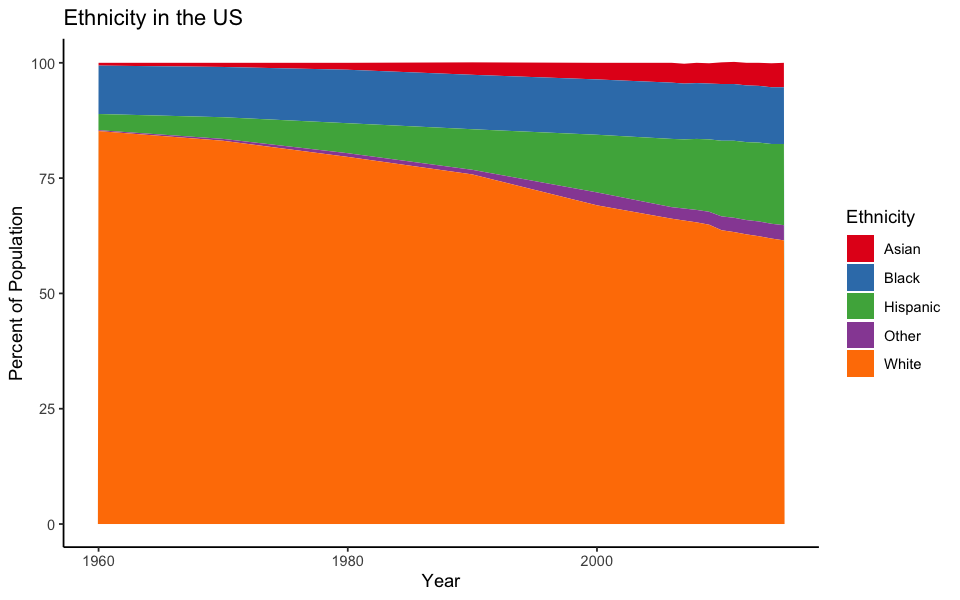

In [ ]:
# code for this plot
library(htmltab)
url <- "https://www.pewresearch.org/hispanic/2017/09/18/2015-statistical-information-on-hispanics-in-united-states/"
htmltab(url, which=3) %>% gather(key="Ethnicity", value="Percent of Population", -1) %>% 
      mutate("Percent of Population" = as.numeric(str_sub(`Percent of Population`, end = -2)),
             Year = as.integer(Year)) %>% 
      ggplot + geom_area(aes(x=Year, y=`Percent of Population`, fill=`Ethnicity`)) +
      theme_classic() + scale_fill_brewer(palette = "Set1")  + labs(title="Ethnicity in the US")